In [1]:
import sys
sys.path.append("../../src")
import matplotlib.pyplot as plt
import networkx as nx

from network import *
from tools import *

In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import seaborn as sns
sns.set_style("ticks")
sns.set_context("notebook")
sns.color_palette("colorblind")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 35
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 45
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
from matplotlib import rc
rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' + '\n'  + r'\usepackage{amssymb}'

In [4]:
network = Network(N=150, prob_ratio=0.1, dirichlet=0.2, overlapping=0, seed=1234)
A0 = network.generate_A0(T=1, avg_degree=10)[0]
u = network.u

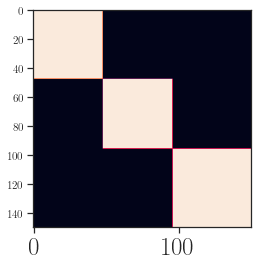

In [14]:
lam = network.lam
plt.imshow(lam)

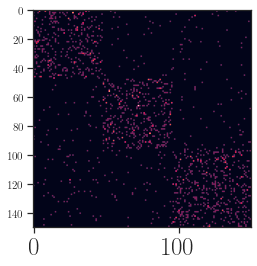

In [15]:
plt.imshow(A0)

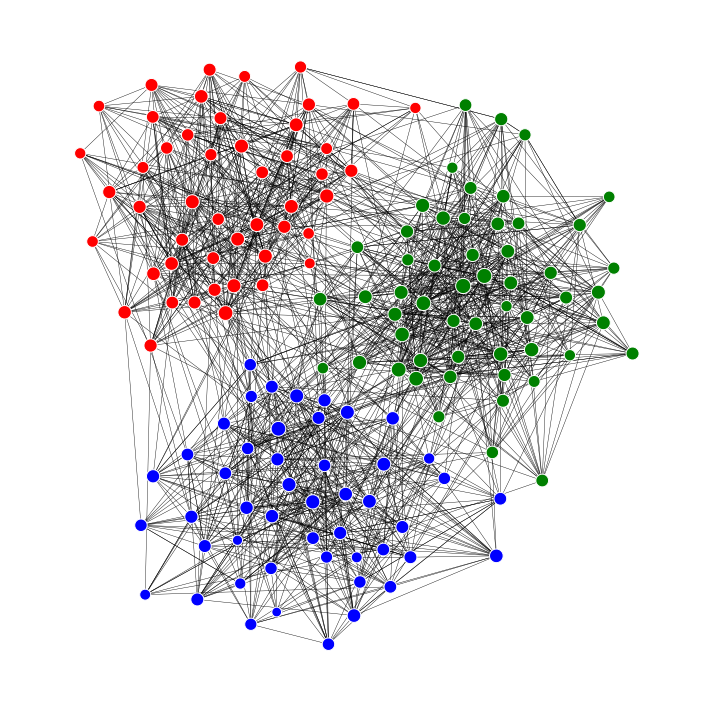

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))


graph = nx.from_numpy_array(A0, create_using=nx.DiGraph) 
directed=False
node_size = [np.log(graph.in_degree[i] + graph.out_degree[i] + 1)*70 for i in list(graph.nodes())]
position = nx.spring_layout(graph, iterations=1000)
#position = nx.fruchterman_reingold_layout(graph)
#plt.gca().set_position((0, 0, 1, 1))

nx.draw_networkx_edges(graph, position, width=0.4, arrows=directed, ax=ax)


for i,n in enumerate(graph.nodes):
    wedge_sizes, wedge_colors = extract_pie_chart_properties(u[i])
    ax.pie(wedge_sizes, normalize=True, center=position[n], colors = wedge_colors, radius=node_size[i]*0.0001) 
    ax.axis("equal")

ax.axis('off')
plt.tight_layout()

plt.savefig("assortative_network.png", bbox_inches="tight", dpi=300)
plt.show()

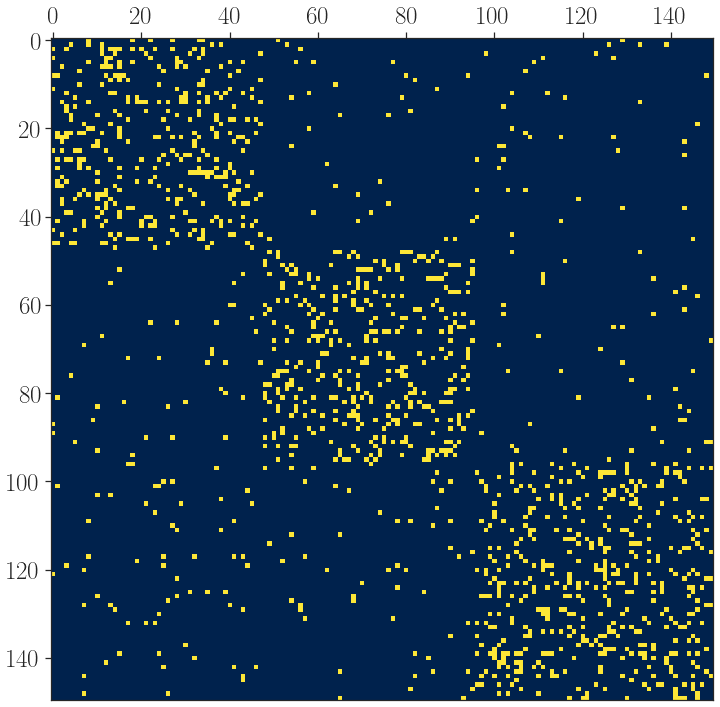

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(A0>0, cmap="cividis")#, extent=(-0.1, 0.1, -0.1, 0.1))
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
plt.tight_layout()

plt.savefig("assortative_adjacency.png", bbox_inches="tight", dpi=300)
plt.show()

/tmp/ipykernel_10409/884293441.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


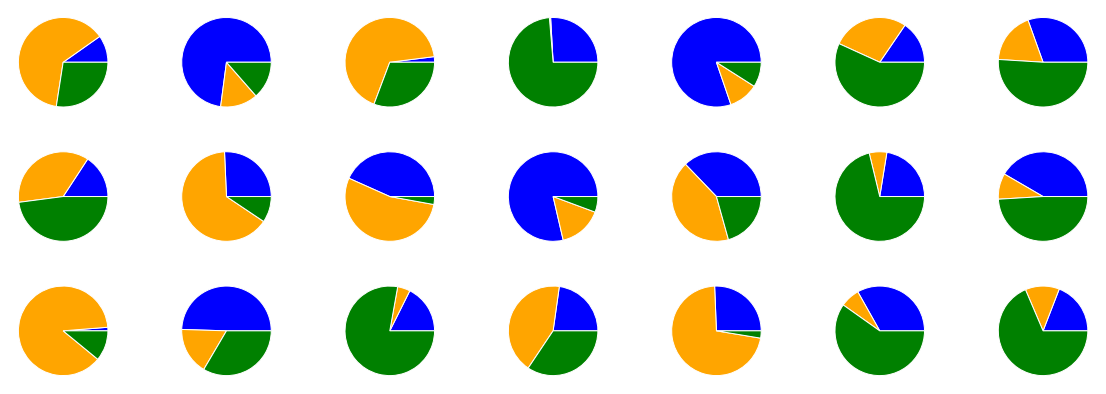

In [9]:
import numpy as np

dirichlet = 1
random_state = np.random.RandomState(seed=42)
size = 21
samples = random_state.dirichlet(dirichlet*np.ones(3), size=size)

import matplotlib.pyplot as plt
#print(samples[0])
fig, axs = plt.subplots(3,7, figsize=(20, 7))
for i,sample in enumerate(samples): 
    
    axs[i//7][i%7].pie(sample, colors=["blue", "orange", "green"])
    fig.show()
plt.savefig("dirichlet_samples.png", bbox_inches="tight", dpi=300)
plt.show()

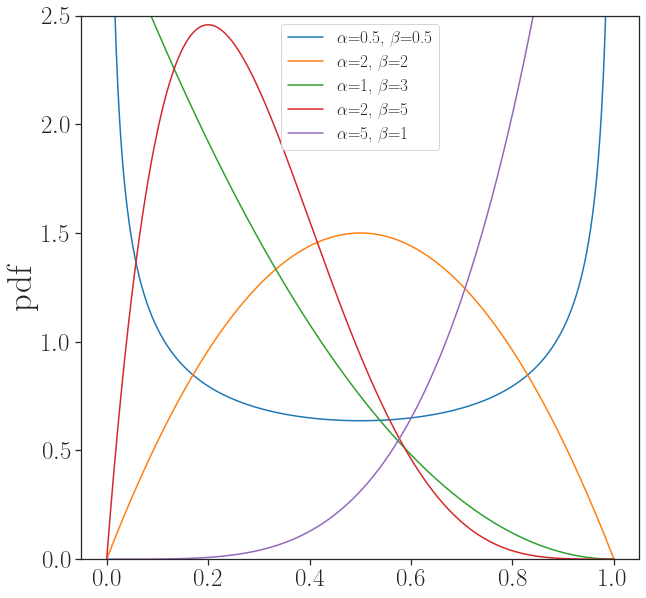

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.set_ylim([0,2.5])
#ax.set_xlabel("x")
ax.set_ylabel("pdf")#"Beta(x;$\\alpha$, $\\beta$)")
betas = [(0.5,0.5), (2,2), (1,3), (2,5), (5,1)]
for (a_beta, b_beta) in betas: 
    x = np.linspace(0,1,1000)
    y = beta.pdf(x,a_beta, b_beta)
    ax.plot(x,y,label=f"$\\alpha$={a_beta}, $\\beta$={b_beta}")
plt.legend(fontsize="xx-large")
plt.savefig("beta_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

In [11]:
x = np.linspace(ss.beta.ppf(0.01, a_beta, b_beta),
                ss.beta.ppf(0.99, a_beta, b_beta), 100)
ax.plot(x, ss.beta.pdf(x, a_beta, b_beta),
       'r-', lw=5, alpha=0.6, label='beta pdf')
plt.show()

NameError: name 'ss' is not defined

## Visualizing the AUC

In [8]:
from sklearn.metrics import roc_curve, auc

import sys
sys.path.append("../../src")
from tools import *

in_folder = "../../data/input/sociopattern/highschool/"
out_folder = "../../data/output/markov/sociopattern/highschool/"
Z = (np.load(in_folder + "params.npz")["Z_markov"]).astype("int")
Q = np.load(out_folder + "params_Exp_1176_0_None.npz")["Q"]

In [9]:
fpr, tpr, threshholds = roc_curve(Z.flatten(),Q.flatten())
auc = auc(fpr, tpr)

In [10]:
print(auc)
threshholds[0]=1

0.7398937762871995


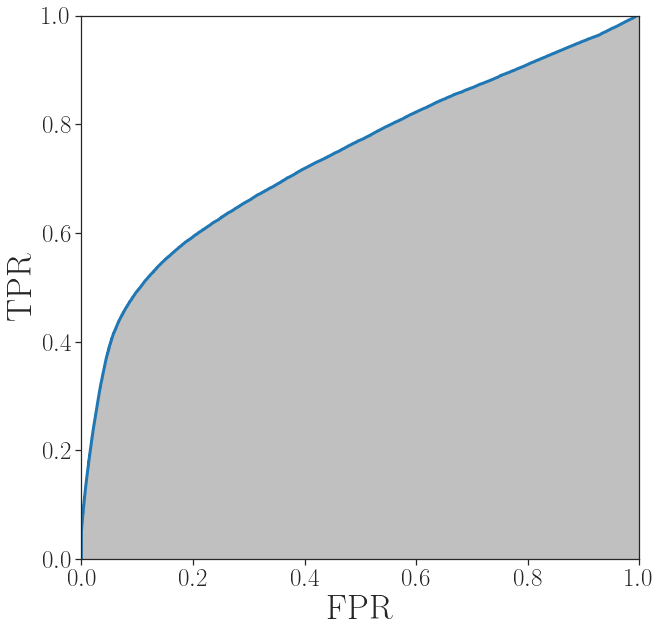

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
eps=1e-3

ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.margins(x=0,y=0)


ax.plot(fpr, np.array(tpr), lw=3)
ax.fill_between(fpr,np.array(tpr), color=lighten_color("grey",0.5))

plt.savefig("roc_curve.png", bbox_inches=0, dpi=300)
plt.show()

In [ ]:
plt.plot(threshholds)

In [ ]:
threshholds[:10]